In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
gdp = pd.read_csv('gdp_per_capita.csv', skiprows=4)
hdii = pd.read_excel('HDI_.xlsx')
gbdd = pd.read_csv('IHME-GBD.csv')
life = pd.read_csv('life_expectancy.csv', skiprows=4)
urban = pd.read_csv('urban_population.csv', skiprows=4)

In [3]:
def hdmi(df, country= 'Nigeria'):
    df=df[df['Country Name'] == country]
    df= df.drop(columns=['Country Code', 'Indicator Name','Indicator Code'])
    df=df.melt(id_vars=['Country Name'], var_name='Year', value_name='value')
    df['Year']=pd.to_numeric(df['Year'],errors='coerce')
    df= df.dropna(subset=['value'])
    return df[['Year', 'value']]

In [4]:
urb = hdmi(urban).rename(columns= {'value': 'urban_percent'})
life=hdmi(life).rename(columns= {'value': 'life_expectancy'})
gdp= hdmi(gdp).rename(columns={'value': 'gdp_per_capita'})

In [5]:

hdi=hdii.drop(columns=['iso3', 'hdicode', 'region','hdi_rank_2023'])
hdi=hdi[hdi['country']== 'Nigeria']
hdi= hdi.melt(id_vars=['country'], var_name= 'Year', value_name='Hdi')
hdi=hdi.drop(columns=['country'])
hdi['Year']=hdi['Year'].str.replace('hdi_', '', regex= False).astype(int)
hdi=hdi.dropna(subset=['Hdi'])

In [6]:
gbd=gbdd.drop(columns=['measure_id', 'location_id','measure_name', 'sex_id','sex_name','age_name','age_id','location_name', 'cause_id','metric_name','metric_id','upper','lower'])
gbd['year']=pd.to_numeric(gbd['year'],errors='coerce')
gbd.rename(columns={'year': 'Year', 'val': 'DALYs'}, inplace= True)


In [7]:
gbd_pivot= gbd.pivot_table(values='DALYs', index= 'Year', columns='cause_name').reset_index()

In [8]:
gbd_pivot = gbd_pivot.rename(columns={
    "All causes": "DALY_total",
    "Communicable, maternal, neonatal, and nutritional diseases": "DALY_comm",
    "Non-communicable diseases": "DALY_ncd"
})

In [9]:
df= urb.merge(life, on= 'Year', how= 'inner')
df=df.merge(gdp, on = 'Year', how = 'inner')
df= df.merge(hdi, on = 'Year', how = 'inner')
df=df.merge(gbd_pivot, on = 'Year', how = 'inner')
df= df.sort_values(by = 'Year').reset_index(drop= True)

In [10]:
df.head()

,Year,urban_percent,life_expectancy,gdp_per_capita,Hdi,DALY_total,DALY_comm,Injuries,DALY_ncd
0,1990.0,29.680,45.733,1577.196166,0.379,121529.316271,97272.201653,6061.024728,18196.089891
1,1991.0,30.176,45.483,1541.590663,0.383,123229.103921,98974.988680,6069.324102,18184.791140
2,1992.0,30.677,45.587,1571.190226,0.388,120049.462597,96239.080061,5959.688678,17850.693859
3,1993.0,31.182,45.783,1498.958950,0.393,119081.892409,95575.014777,5838.318501,17668.559131
4,1994.0,31.691,45.748,1433.388611,0.397,117994.434964,94834.889388,5663.841909,17495.703666


In [11]:
df.shape

(34, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             34 non-null     float64
 1   urban_percent    34 non-null     float64
 2   life_expectancy  34 non-null     float64
 3   gdp_per_capita   34 non-null     float64
 4   Hdi              34 non-null     float64
 5   DALY_total       34 non-null     float64
 6   DALY_comm        34 non-null     float64
 7   Injuries         34 non-null     float64
 8   DALY_ncd         34 non-null     float64
dtypes: float64(9)
memory usage: 2.5 KB


In [13]:
df['Year']=df['Year'].astype(int)

In [14]:
df.describe()

,Year,urban_percent,life_expectancy,gdp_per_capita,Hdi,DALY_total,DALY_comm,Injuries,DALY_ncd
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2006.500000,40.959176,49.599588,1969.598133,0.476206,89514.306875,68200.332125,4851.865079,16462.109671
std,9.958246,7.806200,2.968003,443.936709,0.058695,23434.868286,21962.123965,744.770748,844.269621
min,1990.000000,29.680000,45.483000,1390.469211,0.379000,54295.822267,34176.292455,3835.078060,15494.021511
25%,1998.250000,33.905750,46.263250,1509.616878,0.420500,69724.117332,49215.892267,4247.938815,15737.300605
50%,2006.500000,40.381000,50.128500,1984.995866,0.490500,87563.759619,67041.537715,4609.478703,16116.958878
75%,2014.750000,47.624000,51.939750,2402.486966,0.528500,112940.195571,90185.404999,5547.845280,17202.798167
max,2023.000000,54.283000,54.462000,2585.733607,0.560000,123229.103921,98974.988680,6069.324102,18196.089891


EXPLORATORY DATA ANALYSIS (EDA)

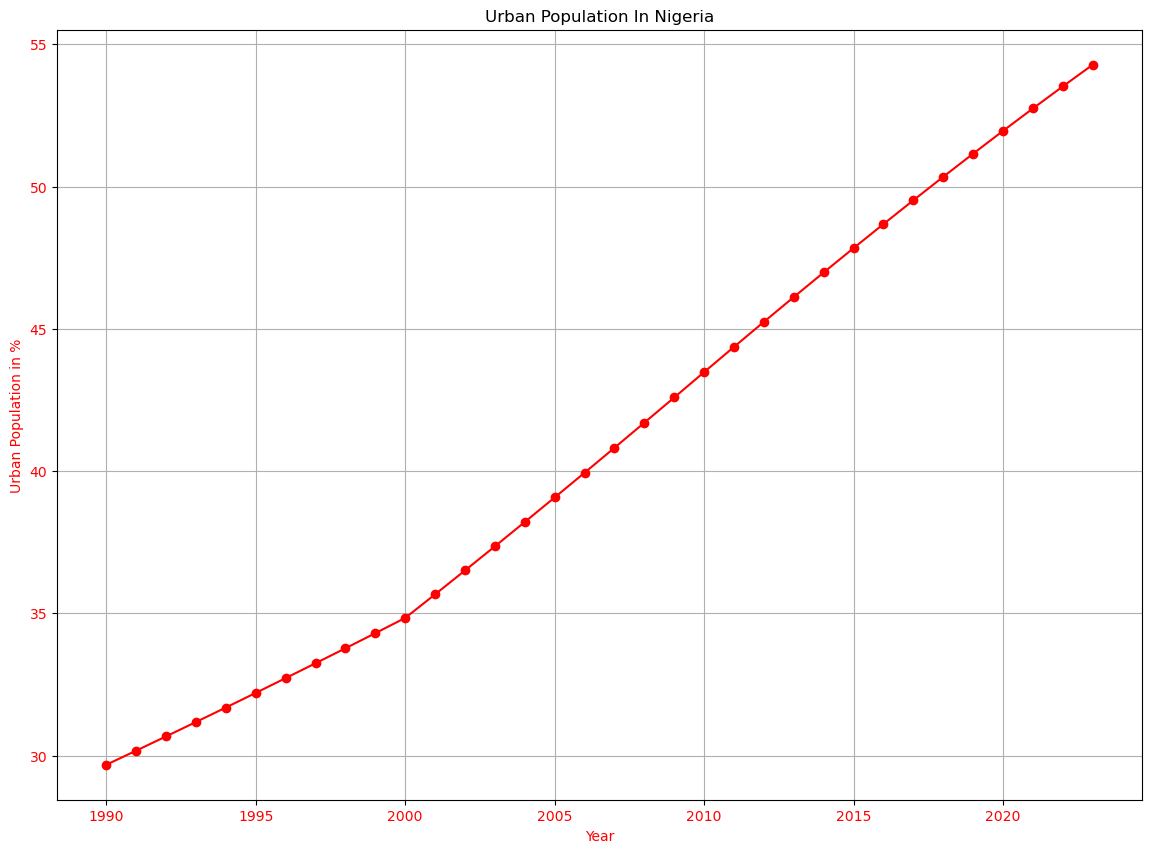

In [15]:
plt.figure(figsize=(14,10))
plt.plot(df['Year'], df['urban_percent'],marker='o', color= 'red')
plt.ylabel('Urban Population in %', color='red')
plt.xlabel('Year', color= 'red')
plt.title('Urban Population In Nigeria')
plt.tick_params(axis= 'both', labelcolor= 'red')
plt.grid(True)
plt.show()

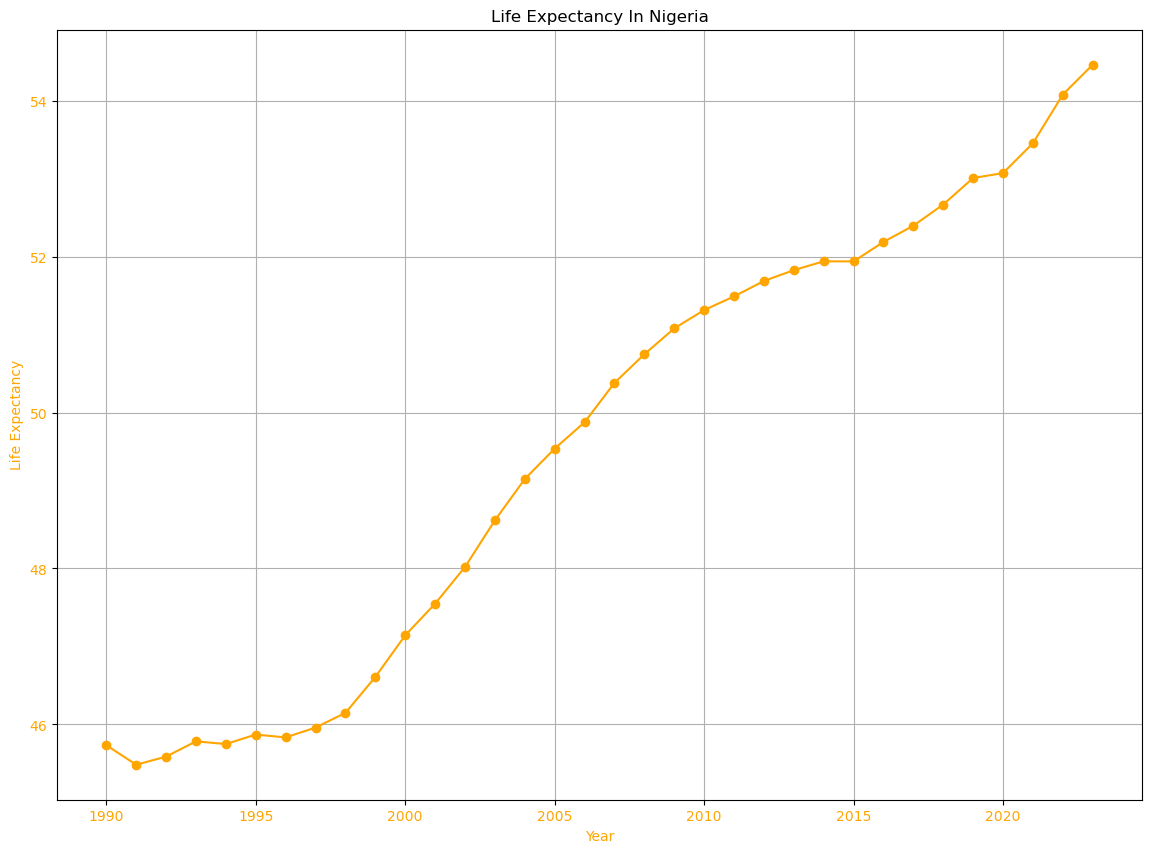

In [16]:
plt.figure(figsize=(14,10))
plt.plot(df['Year'], df['life_expectancy'],marker='o', color= 'orange')
plt.ylabel('Life Expectancy', color='orange')
plt.xlabel('Year', color= 'orange')
plt.title('Life Expectancy In Nigeria')
plt.tick_params(axis= 'both', labelcolor= 'orange')
plt.grid(True)
plt.show()

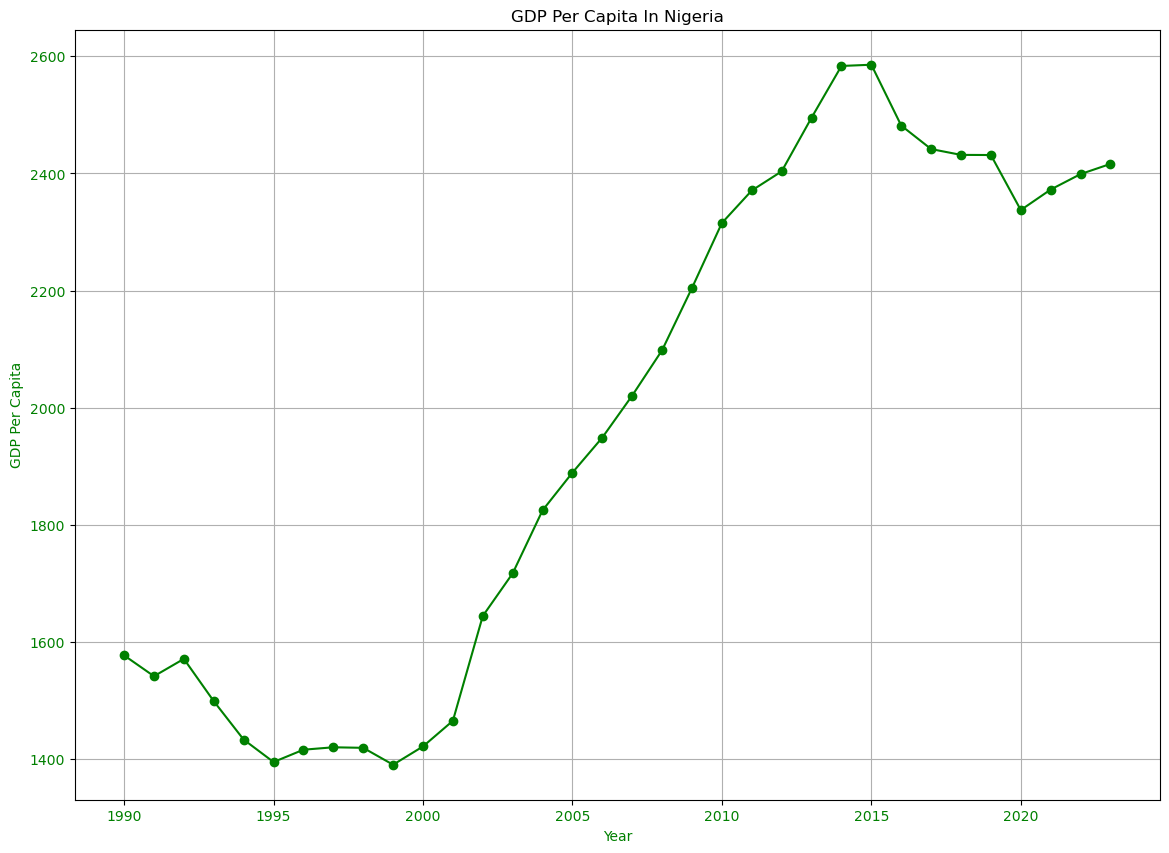

In [17]:
plt.figure(figsize=(14,10))
plt.plot(df['Year'], df['gdp_per_capita'],marker='o', color= 'green')
plt.ylabel('GDP Per Capita', color='green')
plt.xlabel('Year', color= 'green')
plt.title('GDP Per Capita In Nigeria')
plt.tick_params(axis= 'both', labelcolor= 'green')
plt.grid(True)
plt.show()

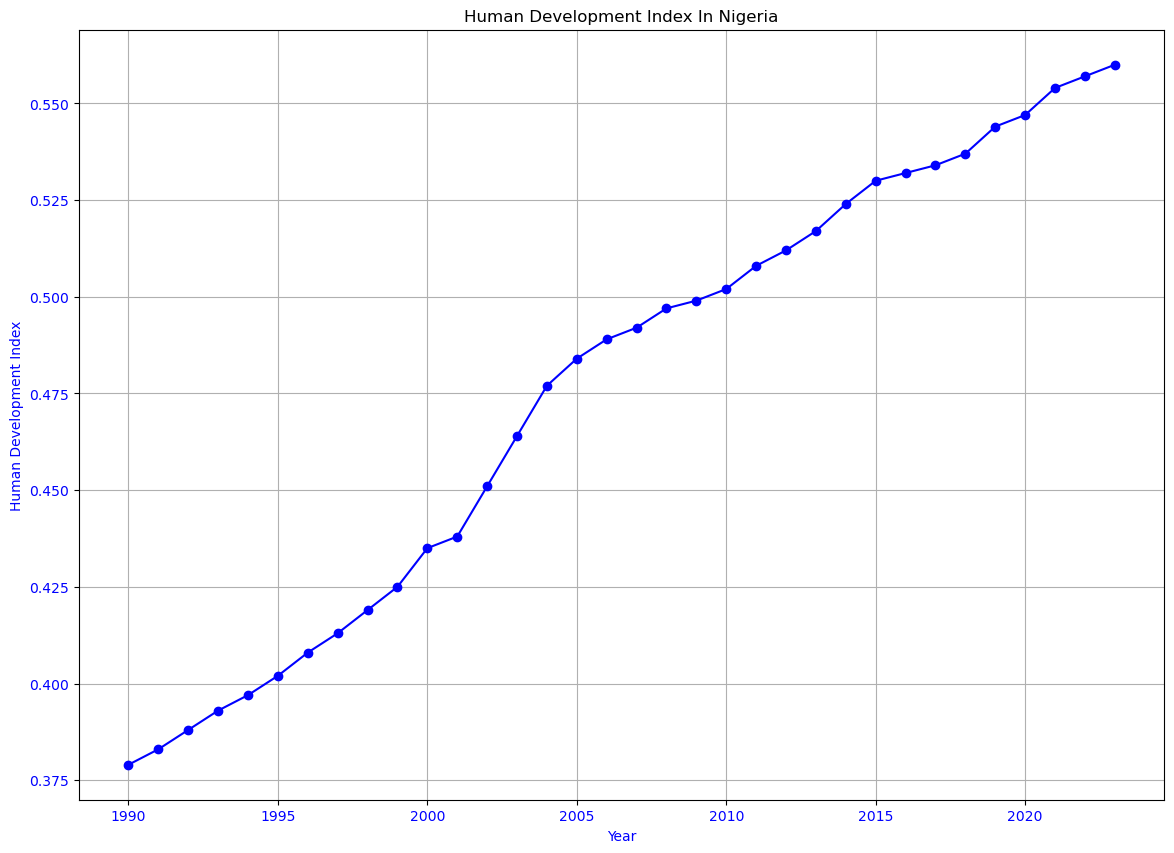

In [18]:
plt.figure(figsize=(14,10))
plt.plot(df['Year'], df['Hdi'],marker='o', color= 'blue')
plt.ylabel('Human Development Index', color='blue')
plt.xlabel('Year', color= 'blue')
plt.title('Human Development Index In Nigeria')
plt.tick_params(axis= 'both', labelcolor= 'blue')
plt.grid(True)
plt.show()

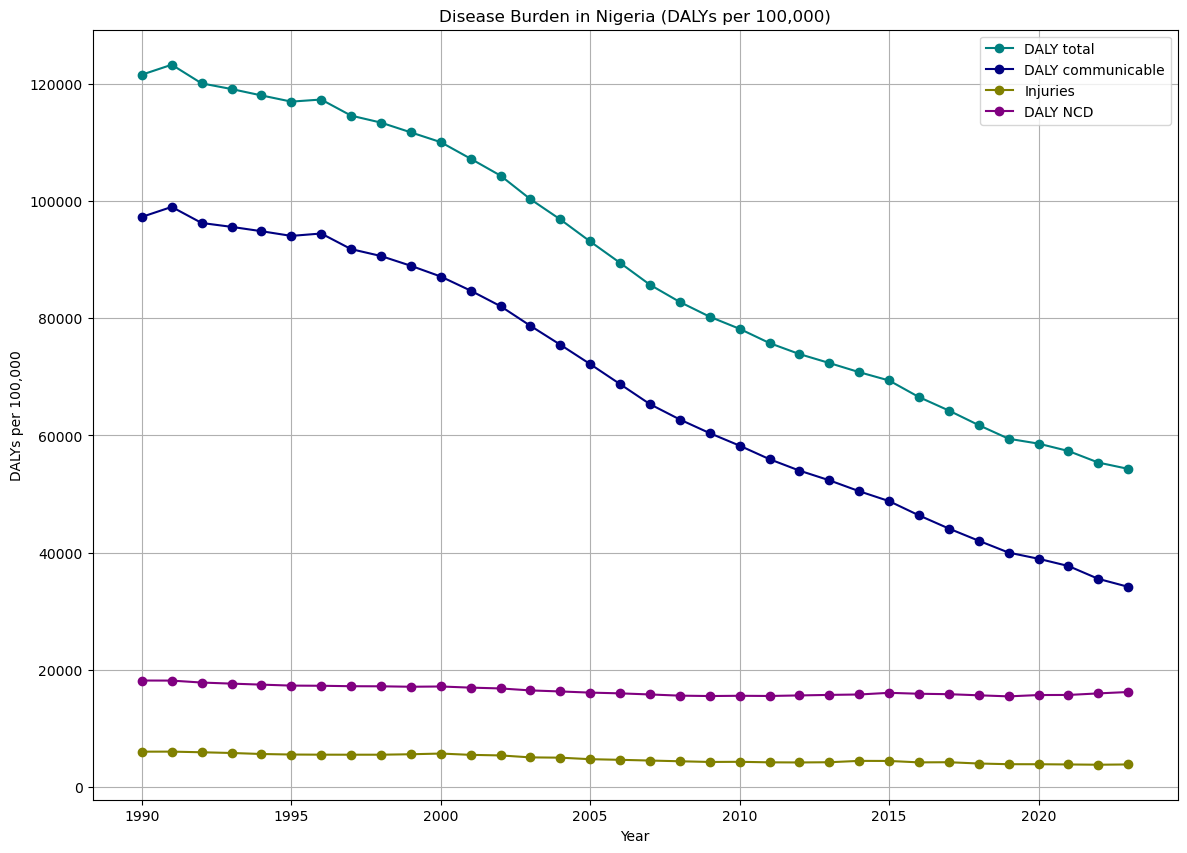

In [36]:
plt.figure(figsize=(14,10))
plt.plot(gbd_pivot["Year"], gbd_pivot["DALY_total"],marker= 'o',color='teal', label = 'DALY total')
plt.plot(gbd_pivot["Year"], gbd_pivot["DALY_comm"],marker= 'o',color='navy', label = 'DALY communicable')
plt.plot(gbd_pivot["Year"], gbd_pivot["Injuries"],marker= 'o',color='olive', label = 'Injuries')
plt.plot(gbd_pivot["Year"], gbd_pivot["DALY_ncd"],marker= 'o',color='purple', label = 'DALY NCD')
plt.title("Disease Burden in Nigeria (DALYs per 100,000)")
plt.xlabel("Year")
plt.ylabel("DALYs per 100,000")
plt.legend()
plt.grid(True)
plt.show()

CORRELATION ANALYSIS

In [20]:
corr_vars= df[['urban_percent',	'life_expectancy',	'gdp_per_capita',	'Hdi',  'DALY_total']]

In [21]:
corr_matrix= corr_vars.corr()

In [22]:
print(corr_matrix)

                 urban_percent  life_expectancy  gdp_per_capita       Hdi  \
urban_percent         1.000000         0.984864        0.924250  0.981952   
life_expectancy       0.984864         1.000000        0.947886  0.991701   
gdp_per_capita        0.924250         0.947886        1.000000  0.928009   
Hdi                   0.981952         0.991701        0.928009  1.000000   
DALY_total           -0.994443        -0.994952       -0.948948 -0.989585   

                 DALY_total  
urban_percent     -0.994443  
life_expectancy   -0.994952  
gdp_per_capita    -0.948948  
Hdi               -0.989585  
DALY_total         1.000000  


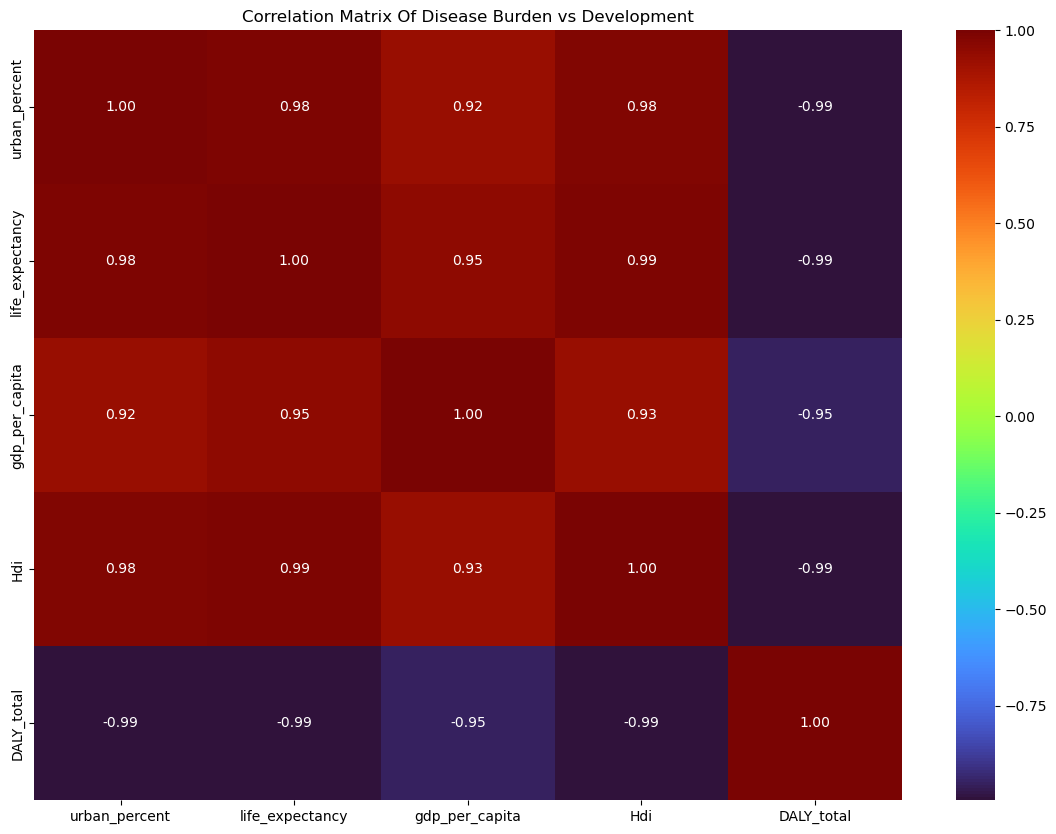

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot= True, cmap= 'turbo', fmt='.2f')
plt.title('Correlation Matrix Of Disease Burden vs Development')
plt.show()

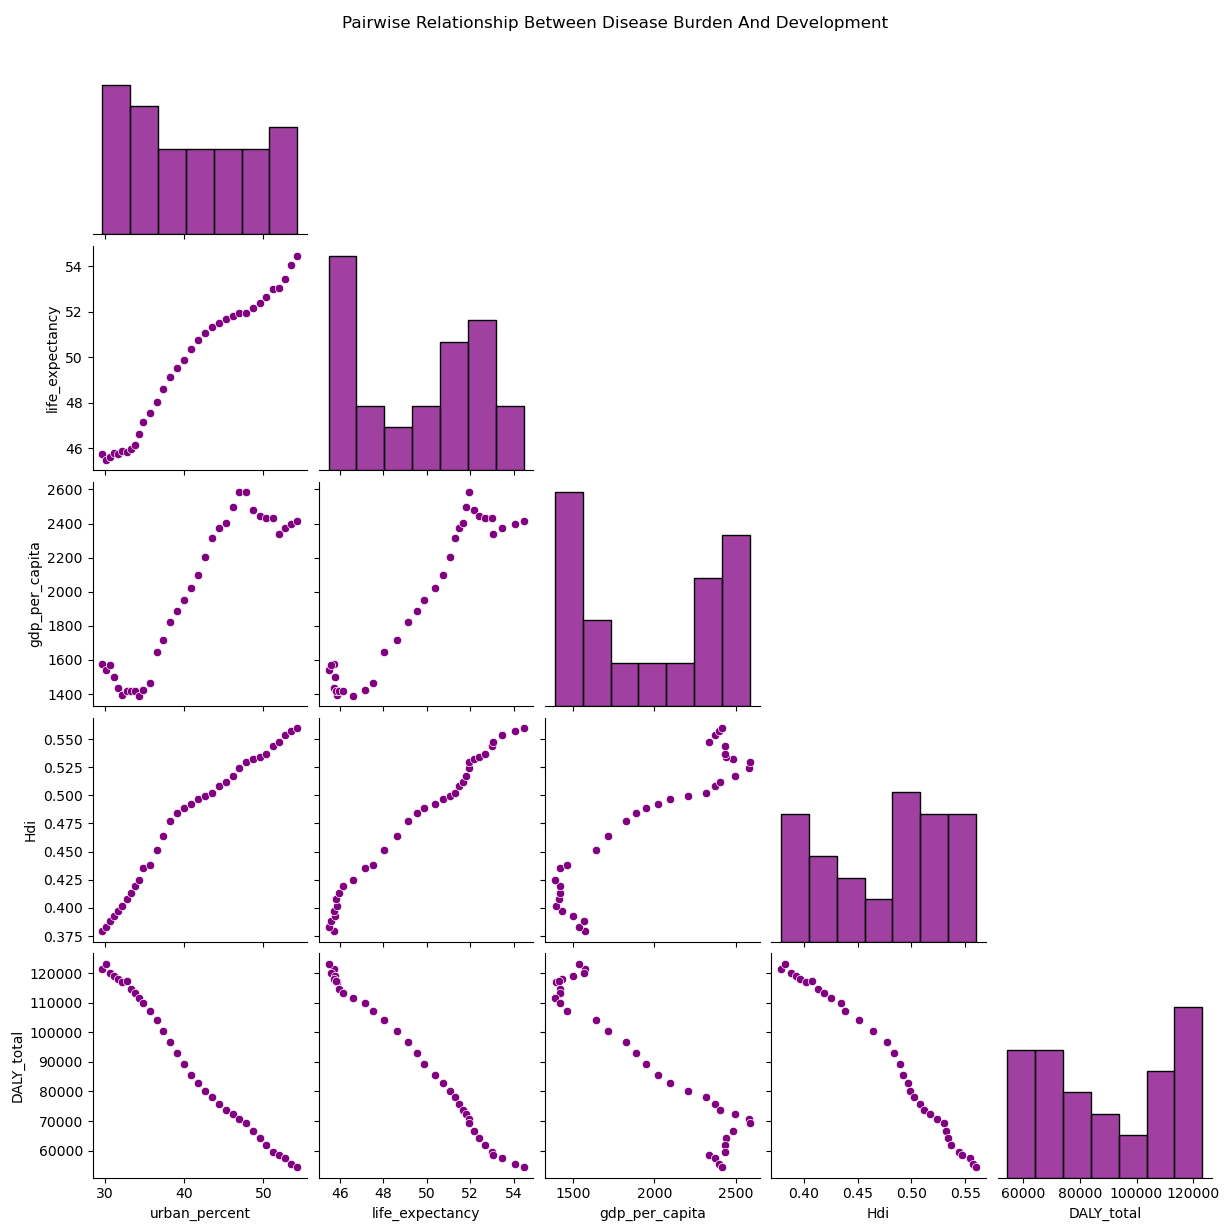

In [24]:
sns.pairplot(df,vars=['urban_percent',	'life_expectancy',	'gdp_per_capita',	'Hdi', 'DALY_total'],corner=True, plot_kws={"color": "purple"},diag_kws={'color':'purple'})
plt.suptitle('Pairwise Relationship Between Disease Burden And Development')
plt.show()

REGRESSION ANALYSIS

SIMPLE LINEAR REGRESSION

In [25]:
x = df['gdp_per_capita']
y = df['DALY_total']

x_const = sm.add_constant(x)

model_gdp = sm.OLS(y,x_const).fit()

model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DALY_total   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     289.6
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.36e-17
Time:                        20:49:07   Log-Likelihood:                -350.61
No. Observations:                  34   AIC:                             705.2
Df Residuals:                      32   BIC:                             708.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.882e+05   5938.855     31.686      0.000    1.76e+05       2e+05
gdp_per_capita   -50.0938      2.944    -17.018      0.000     -56.090     -44.098
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.829
Skew:                           0.016   Prob(JB):                        0.661
Kurtosis:                       2.236   Cond. No.                     9.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

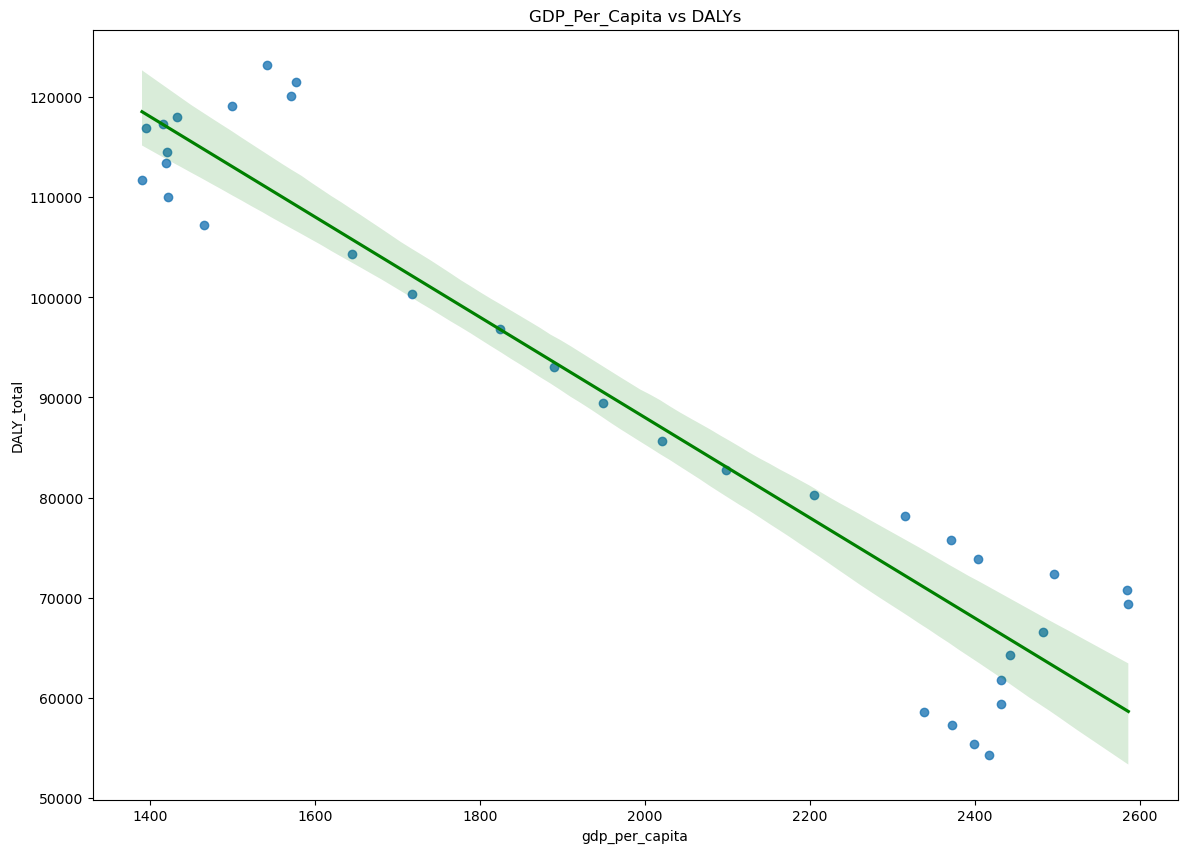

In [26]:
plt.figure(figsize=(14,10))
sns.regplot(x= 'gdp_per_capita', y = 'DALY_total', data = df, line_kws = {'color': 'green'})
plt.title('GDP_Per_Capita vs DALYs')
plt.show()

In [27]:
x = df['life_expectancy']
y = df['DALY_total']

x_const = sm.add_constant(x)

model_gdp = sm.OLS(y,x_const).fit()

model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DALY_total   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3145.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.58e-33
Time:                        20:49:07   Log-Likelihood:                -311.68
No. Observations:                  34   AIC:                             627.4
Df Residuals:                      32   BIC:                             630.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.792e+05   6959.787     68.848      0.000    4.65e+05    4.93e+05
life_expectancy -7855.9751    140.076    -56.084      0.000   -8141.301   -7570.649
==============================================================================
Omnibus:                       11.779   Durbin-Watson:                   0.249
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                2.780
Skew:                          -0.180   Prob(JB):                        0.249
Kurtosis:                       1.646   Cond. No.                         845.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

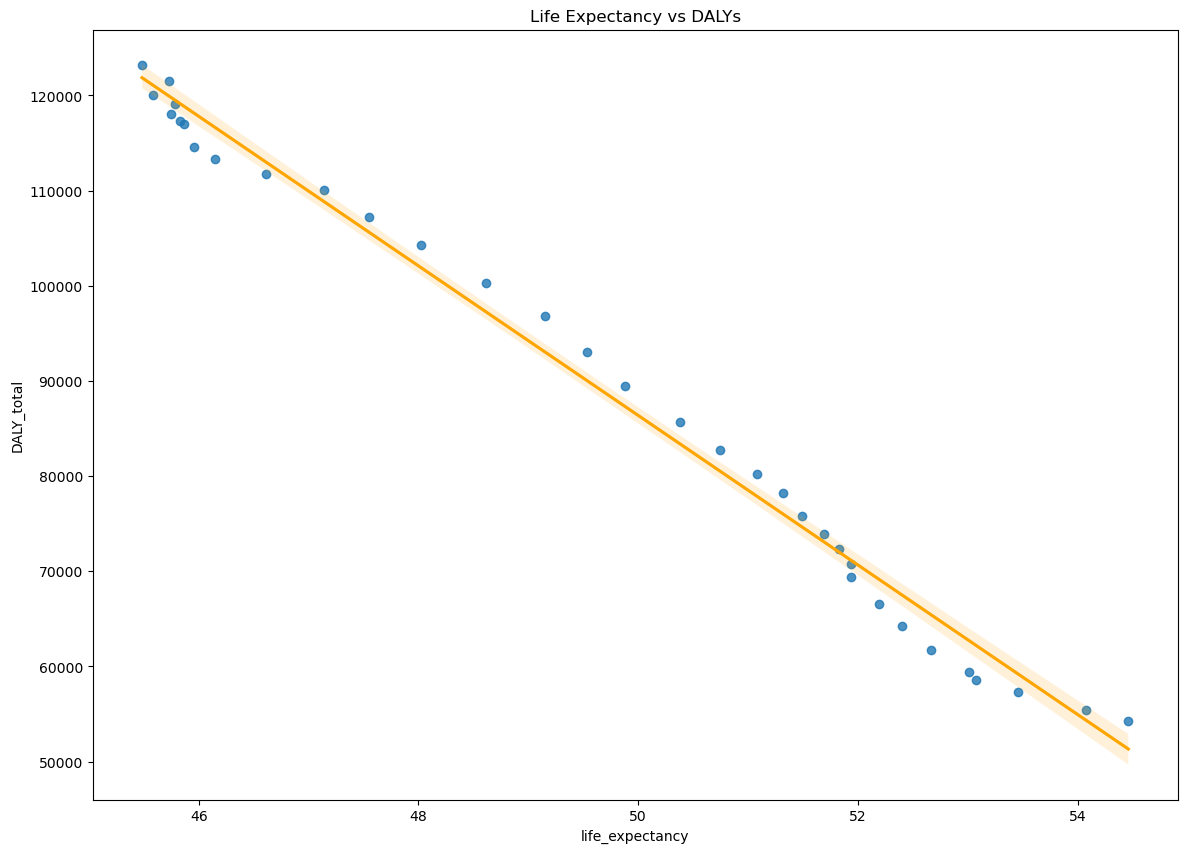

In [28]:
plt.figure(figsize=(14,10))
sns.regplot(x= 'life_expectancy', y = 'DALY_total', data = df, line_kws = {'color': 'orange'})
plt.title('Life Expectancy vs DALYs')
plt.show()

In [29]:
x = df['urban_percent']
y = df['DALY_total']

x_const = sm.add_constant(x)

model_gdp = sm.OLS(y,x_const).fit()

model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DALY_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2855.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           7.28e-33
Time:                        20:49:08   Log-Likelihood:                -313.30
No. Observations:                  34   AIC:                             630.6
Df Residuals:                      32   BIC:                             633.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.118e+05   2328.292     90.965      0.000    2.07e+05    2.17e+05
urban_percent -2985.4026     55.868    -53.437      0.000   -3099.202   -2871.603
==============================================================================
Omnibus:                        2.202   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.627
Skew:                          -0.344   Prob(JB):                        0.443
Kurtosis:                       2.179   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

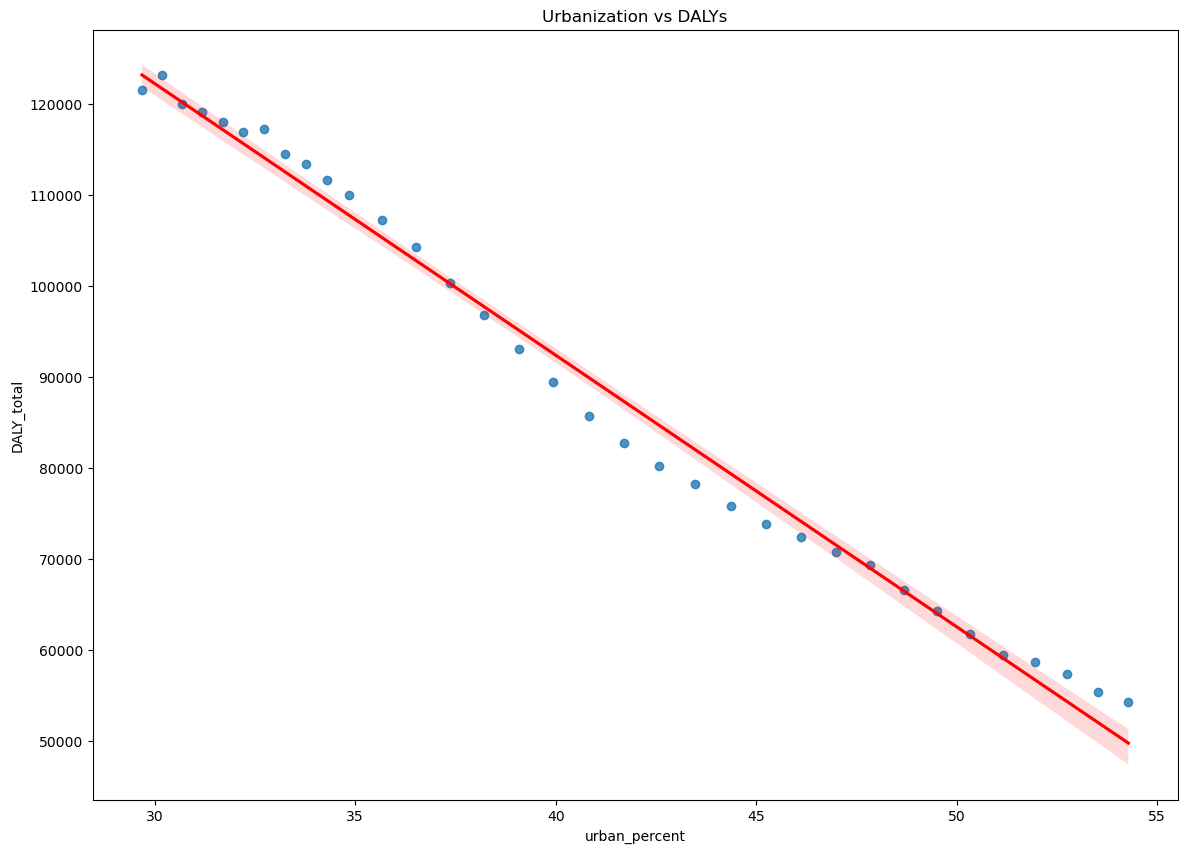

In [30]:
plt.figure(figsize=(14,10))
sns.regplot(x= 'urban_percent', y = 'DALY_total', data = df, line_kws = {'color': 'red'})
plt.title('Urbanization vs DALYs')
plt.show()

In [31]:
x = df['Hdi']
y = df['DALY_total']

x_const = sm.add_constant(x)

model_gdp = sm.OLS(y,x_const).fit()

model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DALY_total   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1512.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.63e-28
Time:                        20:49:08   Log-Likelihood:                -323.94
No. Observations:                  34   AIC:                             651.9
Df Residuals:                      32   BIC:                             654.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.777e+05   4873.824     56.971      0.000    2.68e+05    2.88e+05
Hdi        -3.951e+05   1.02e+04    -38.888      0.000   -4.16e+05   -3.74e+05
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.017
Skew:                           0.570   Prob(JB):                        0.365
Kurtosis:                       2.649   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

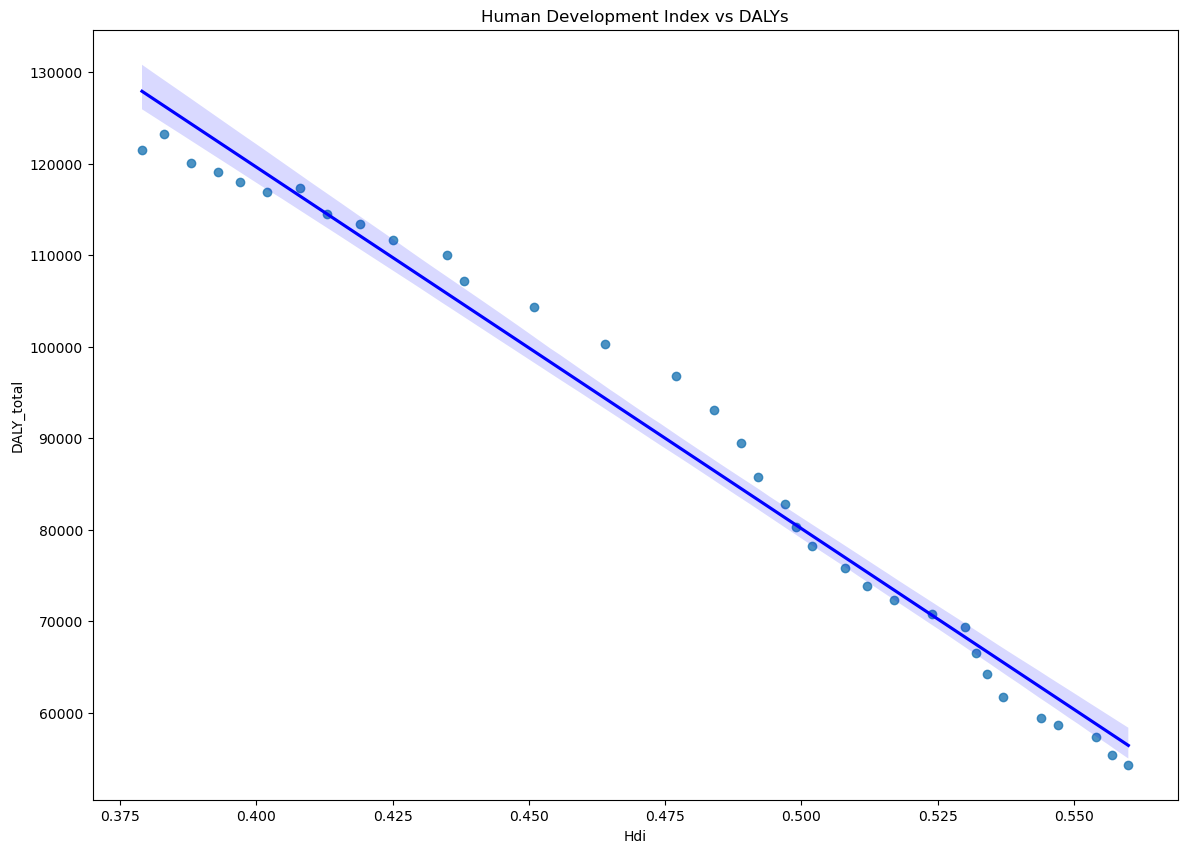

In [32]:
plt.figure(figsize=(14,10))
sns.regplot(x= 'Hdi', y = 'DALY_total', data = df, line_kws = {'color': 'blue'})
plt.title('Human Development Index vs DALYs')
plt.show()

MULTIPLE REGRESSION

In [33]:
x_multi = df[['gdp_per_capita', 'life_expectancy', 'urban_percent', 'Hdi']]
x_multi = sm.add_constant(x_multi)
model_multi = sm.OLS(y, x_multi).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DALY_total   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4028.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.40e-39
Time:                        20:49:08   Log-Likelihood:                -282.37
No. Observations:                  34   AIC:                             574.7
Df Residuals:                      29   BIC:                             582.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.967e+05   1.95e+04     15.211      0.000    2.57e+05    3.37e+05
gdp_per_capita     -6.0851      1.372     -4.435      0.000      -8.891      -3.279
life_expectancy -2311.6533    656.305     -3.522      0.001   -3653.947    -969.359
urban_percent   -1509.2249    141.102    -10.696      0.000   -1797.810   -1220.640
Hdi             -3.938e+04   2.61e+04     -1.509      0.142   -9.27e+04     1.4e+04
==============================================================================
Omnibus:                        3.138   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.122
Skew:                           0.419   Prob(JB):                        0.346
Kurtosis:                       2.107   Cond. No.                     3.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""